In [7]:
import pandas as pd
import re
import os
import csv

# Load the CSV file
base_dir = 'rename_view_20/reduced_20_rand_1'
# base_dir = 'view_cr'
df = pd.read_csv(os.path.join(base_dir, 'result.csv'), header=None)
# results = []
Full_TPs = 0; Full_FPs = 0; Full_FNs = 0; Full_TNs = 0
TPs = 0; FPs = 0; FNs = 0; TNs = 0
correct = 0; total = 0
category = 'wood'
with open(os.path.join(base_dir, 'f1_score.csv'), 'w') as f:
    pass

for idx in range(len(df[0])):
    if len(df[0][idx].split('/'))<3:
        match = re.search(r'(\d+)/(\d+)', df[0][idx])
        # match = re.search(r'correct: (\d+), total: (\d+)', df[0][idx])
        if 'good' in df[0][idx-1]:
            TPs += int(match.group(1))
            Full_TPs += int(match.group(1))
            FNs += int(match.group(2)) - int(match.group(1))
            Full_FNs += int(match.group(2)) - int(match.group(1))
        else:
            TNs += int(match.group(1))
            Full_TNs += int(match.group(1))
            FPs += int(match.group(2)) - int(match.group(1))
            Full_FPs += int(match.group(2)) - int(match.group(1))
        correct += int(match.group(1))
        total += int(match.group(2))
        try:
            if not category in df[0][idx+1]:
                with open(os.path.join(base_dir, 'f1_score.csv'), 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([category])
                    writer.writerow([f'{TPs=}, {FPs=}, {FNs=}, {TNs=}'])
                    try:
                        precision = TPs/(TPs+FPs)
                        recall = TPs/(TPs+FNs)
                        writer.writerow([f'F1 score: {2*(precision*recall)/(precision+recall)}'])
                    except:
                        writer.writerow([f'zero devision occurred'])
                    writer.writerow(['######################################################'])
                TPs = 0; FPs = 0; FNs = 0; TNs = 0
                category = df[0][idx+1].split('/')[3]
        except:
            with open(os.path.join(base_dir, 'f1_score.csv'), 'a') as f:
                writer = csv.writer(f)
                writer.writerow([category])
                writer.writerow([f'{TPs=}, {FPs=}, {FNs=}, {TNs=}'])
                try:
                    precision = TPs/(TPs+FPs)
                    recall = TPs/(TPs+FNs)
                    writer.writerow([f'F1 score: {2*(precision*recall)/(precision+recall)}'])
                except:
                    writer.writerow([f'zero devision occurred'])
                writer.writerow(['######################################################'])
            pass
print('done')
with open(os.path.join(base_dir, 'f1_score.csv'), 'a') as f:
    writer = csv.writer(f)
    writer.writerow(['FULL F1 SCORE'])
    writer.writerow([f'{Full_TPs=}, {Full_FPs=}, {Full_FNs=}, {Full_TNs=}'])
    writer.writerow([f'{correct=}, {total=}'])
    precision = Full_TPs/(Full_TPs+Full_FPs)
    recall = Full_TPs/(Full_TPs+Full_FNs)
    writer.writerow([f'F1 score: {2*(precision*recall)/(precision+recall)}'])

print(f'{Full_TPs=}, {Full_FPs=}, {Full_FNs=}, {Full_TNs=}')
print(f'{correct=}, {total=}')
print(f'F1 score: {2*(precision*recall)/(precision+recall)}')

done
Full_TPs=40, Full_FPs=7, Full_FNs=2171, Full_TNs=1127
correct=1167, total=3345
F1 score: 0.03542958370239149


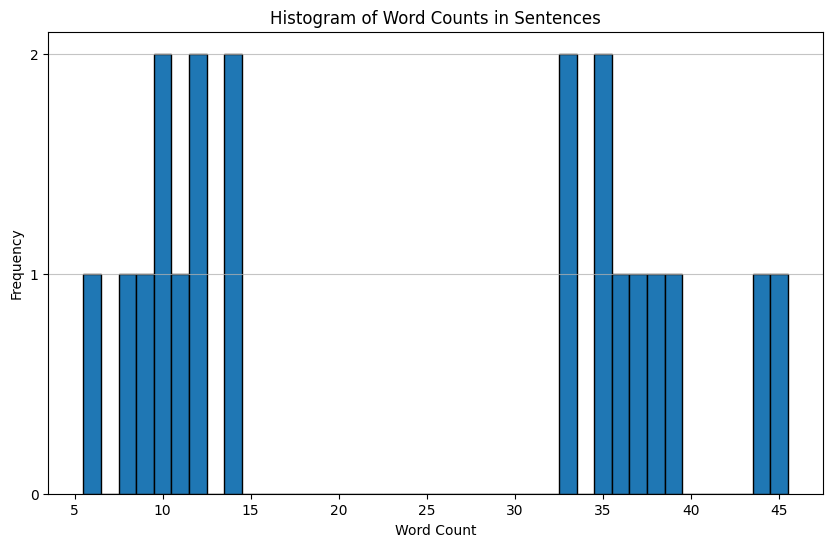

In [63]:
# 各文章の単語数をカウントする

yes_responses_array = [
    ["Yes. The {product} definitely shows {defect}."],
    ["Yes. A clear indication of {defect} on this {product} suggests it's defective."],
    ["Yes. Signs of {defect} are evident in the {product}, indicating a problem."],
    ["Yes. This {product} has {defect}, a clear defect."],
    ["Yes. Unmistakably, the {product} shows {defect}, pointing to a defect."],
    ["Yes. {defect} in the {product} is obvious, indicating a significant defect."],
    ["Yes. Considering the {product}, the presence of {defect} suggests it's not in perfect condition."],
    ["Yes. {defect} is noticeable on the {product}, indicating it's not as it should be."],
    ["Yes. With {defect} present, this {product} certainly seems defective."],
    ["Yes. {defect} on this {product} clearly points to a problem."],
    ["Yes. Upon a thorough examination of the {product}, it is quite apparent that there are significant signs of {defect}. This observation is critical as it strongly suggests that the product has a manufacturing or usage defect, which could potentially impact its functionality or aesthetic appeal."],
    ["Yes. After carefully analyzing the {product}, it's clear that there are unmistakable indications of {defect}. This is a cause for concern as it not only affects the integrity of the product but also raises questions about its longevity and reliability in the long term."],
    ["Yes. The presence of {defect} on this particular {product} is undeniable. This kind of flaw is not just superficial but could potentially signify deeper issues within the product, affecting its overall performance and customer satisfaction."],
    ["Yes. The {product} in question undeniably shows signs of {defect}. This finding is significant because it not only diminishes the product's aesthetic value but also suggests a compromise in the quality control processes of its manufacturing."],
    ["Yes. After an in-depth review, it's evident that the {product} exhibits {defect}. This is particularly concerning as it may indicate a lapse in the manufacturing standards or possibly mishandling during shipping or storage."],
    ["Yes. The {product} clearly displays {defect}, which is a red flag for potential buyers. Such defects are not just minor issues but could lead to further complications, possibly affecting the product's usability and customer satisfaction."],
    ["Yes. There is a noticeable presence of {defect} on the {product}, which is alarming. This type of defect could have various implications, ranging from aesthetic damage to potential functional impairments, depending on the severity and nature of the flaw."],
    ["Yes. This {product} unmistakably shows signs of {defect}, which is a significant concern. Defects of this nature are often indicative of deeper problems and could hint at a broader issue with the product line or brand quality."],
    ["Yes. After a detailed inspection, the {product} has visible {defect}, and this cannot be overlooked. Such defects raise serious questions about the product's durability and the reliability of the manufacturer's quality assurance processes."],
    ["Yes. It's unmistakably clear that the {product} has {defect}. This finding is critical as it not only impacts the immediate usability of the product but also raises concerns about its long-term durability and the trustworthiness of the brand."],
]

# 単語数をカウントする関数
def count_words(sentence):
    return len(sentence.split())

# 各文章の単語数をカウント
word_counts = [count_words(response[0]) for response in yes_responses_array]

# 単語数の頻度をカウント
word_count_frequency = {}
for count in word_counts:
    if count in word_count_frequency:
        word_count_frequency[count] += 1
    else:
        word_count_frequency[count] = 1

word_count_frequency



import matplotlib.pyplot as plt

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 2), align='left', edgecolor='black')
plt.title('Histogram of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.yticks(range(0, 3, 1))

# ヒストグラムの表示
plt.show()


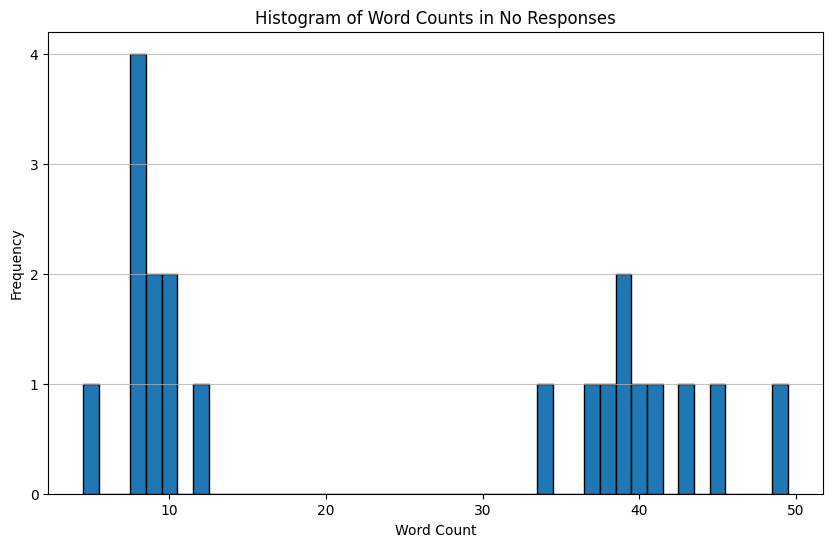

In [65]:
# 各文章の単語数をカウントするためのno_responses_array

no_responses_array = [
    ["No. This {product} seems fine."],
    ["No. No visible faults like {defect} on the {product}."],
    ["No. {product} appears free of issues such as {defect}."],
    ["No. No {defect} faults detected on the {product}."],
    ["No. After checking, the {product} seems clear of {defect} issues."],
    ["No. {product} lacks any visible {defect} faults, indicating good condition."],
    ["No. Nothing like {defect} found on this {product}."],
    ["No. {product} looks good, no {defect} defects seen."],
    ["No. {product} appears non-defective, lacking {defect} type faults."],
    ["No. This {product} displays no {defect} issues, suggesting it's in prime condition."],
    ["No. After a comprehensive examination of the {product}, it appears to be free of any visible faults like {defect}. This observation is significant as it speaks volumes about the product's quality and the rigorous standards employed in its manufacturing process, ensuring that it is in a non-defective, pristine condition."],
    ["No. The {product} does not show any signs of faults such as {defect}. This is a testament to the high-quality materials and craftsmanship that have gone into its creation, ensuring that the product not only meets but exceeds the expectations of durability and aesthetic appeal."],
    ["No. Upon detailed scrutiny, there are no indications of faults like {defect} on the {product}. This finding is important as it suggests that the product has been manufactured with precision and care, maintaining a high standard of quality control."],
    ["No. The {product} seems to be in impeccable condition, displaying no visible faults like {defect}. This is reassuring as it indicates that the product has been handled and stored with utmost care, preserving its quality and integrity."],
    ["No. After a thorough inspection, the {product} does not exhibit any faults such as {defect}. This is a clear indicator of the product's superior quality and the meticulous attention to detail that has gone into its manufacturing process."],
    ["No. There are no visible signs of any faults like {defect} on the {product}, suggesting it has been crafted to perfection. This lack of defects is a strong indication of the product's robustness and the stringent quality checks it has undergone."],
    ["No. The {product} is devoid of any visible faults, including those like {defect}. This is a significant point, as it not only demonstrates the product's aesthetic perfection but also its functional reliability, which is a crucial aspect for consumer satisfaction."],
    ["No. Upon careful observation, the {product} displays no faults of the {defect} kind. This suggests that the product has passed through rigorous quality assessments, ensuring that it is in top-notch condition for the end-user."],
    ["No. The {product} is in a non-defective state, showing no signs of faults such as {defect}. This lack of defects is commendable and reflects the high standards of quality and care taken in the product's design and manufacturing process."],
    ["No. There are no discernible faults like {defect} on the {product}, which is a clear indicator of its exceptional quality. This flawless condition underscores the manufacturer's commitment to delivering a product that is not only visually appealing but also structurally sound and reliable."],
]

# 単語数をカウント
no_word_counts = [count_words(response[0]) for response in no_responses_array]

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(no_word_counts, bins=range(min(no_word_counts), max(no_word_counts) + 2), align='left', edgecolor='black')
plt.title('Histogram of Word Counts in No Responses')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.yticks(range(0, 5, 1))

# ヒストグラムの表示
plt.show()
